## CS-ELEC-ML SA#1
Josh Kenn Viray - 3CSC


### Preliminary Information

Dataset Attributes 
The dataset consists of 13 input features and one target variable: 
Input Features: 
1.  CRIM: Per capita crime rate by town. 
2.  ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. 
3.  INDUS: Proportion of non-retail business acres per town. 
4.  CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). 
5.  NOX: Nitric oxides concentration (parts per 10 million). 
6.  RM: Average number of rooms per dwelling. 
7.  AGE: Proportion of owner-occupied units built prior to 1940. 
8.  DIS: Weighted distances to five Boston employment centers. 
9.  RAD: Index of accessibility to radial highways. 
10. TAX: Full-value property-tax rate per $10,000. 
11. PTRATIO: Pupil-teacher ratio by town. 
12. B: Calculated as 1000(Bk−0.63)21000(Bk - 0.63)^21000(Bk−0.63)2, where BkBkBk is 
the proportion of Black residents by town. 
13. LSTAT: Percentage of lower-status population. 
Target Variable: 
1.  MEDV: Median value of owner-occupied homes in $1000's

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
# Load the dataset
data = pd.read_csv('./boston.csv')

### 1. Exploratory Data Analysis

- Perform EDA to gain insights into the data distribution and relationships between 
features. 
- Visualize correlations between the input features and the target variable (MEDV). 
- Identify and handle any missing data or outliers.

In [3]:
# Display the top and bottom 5 rows of the dataset
pd.concat([data.head(), data.tail()])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


<Axes: >

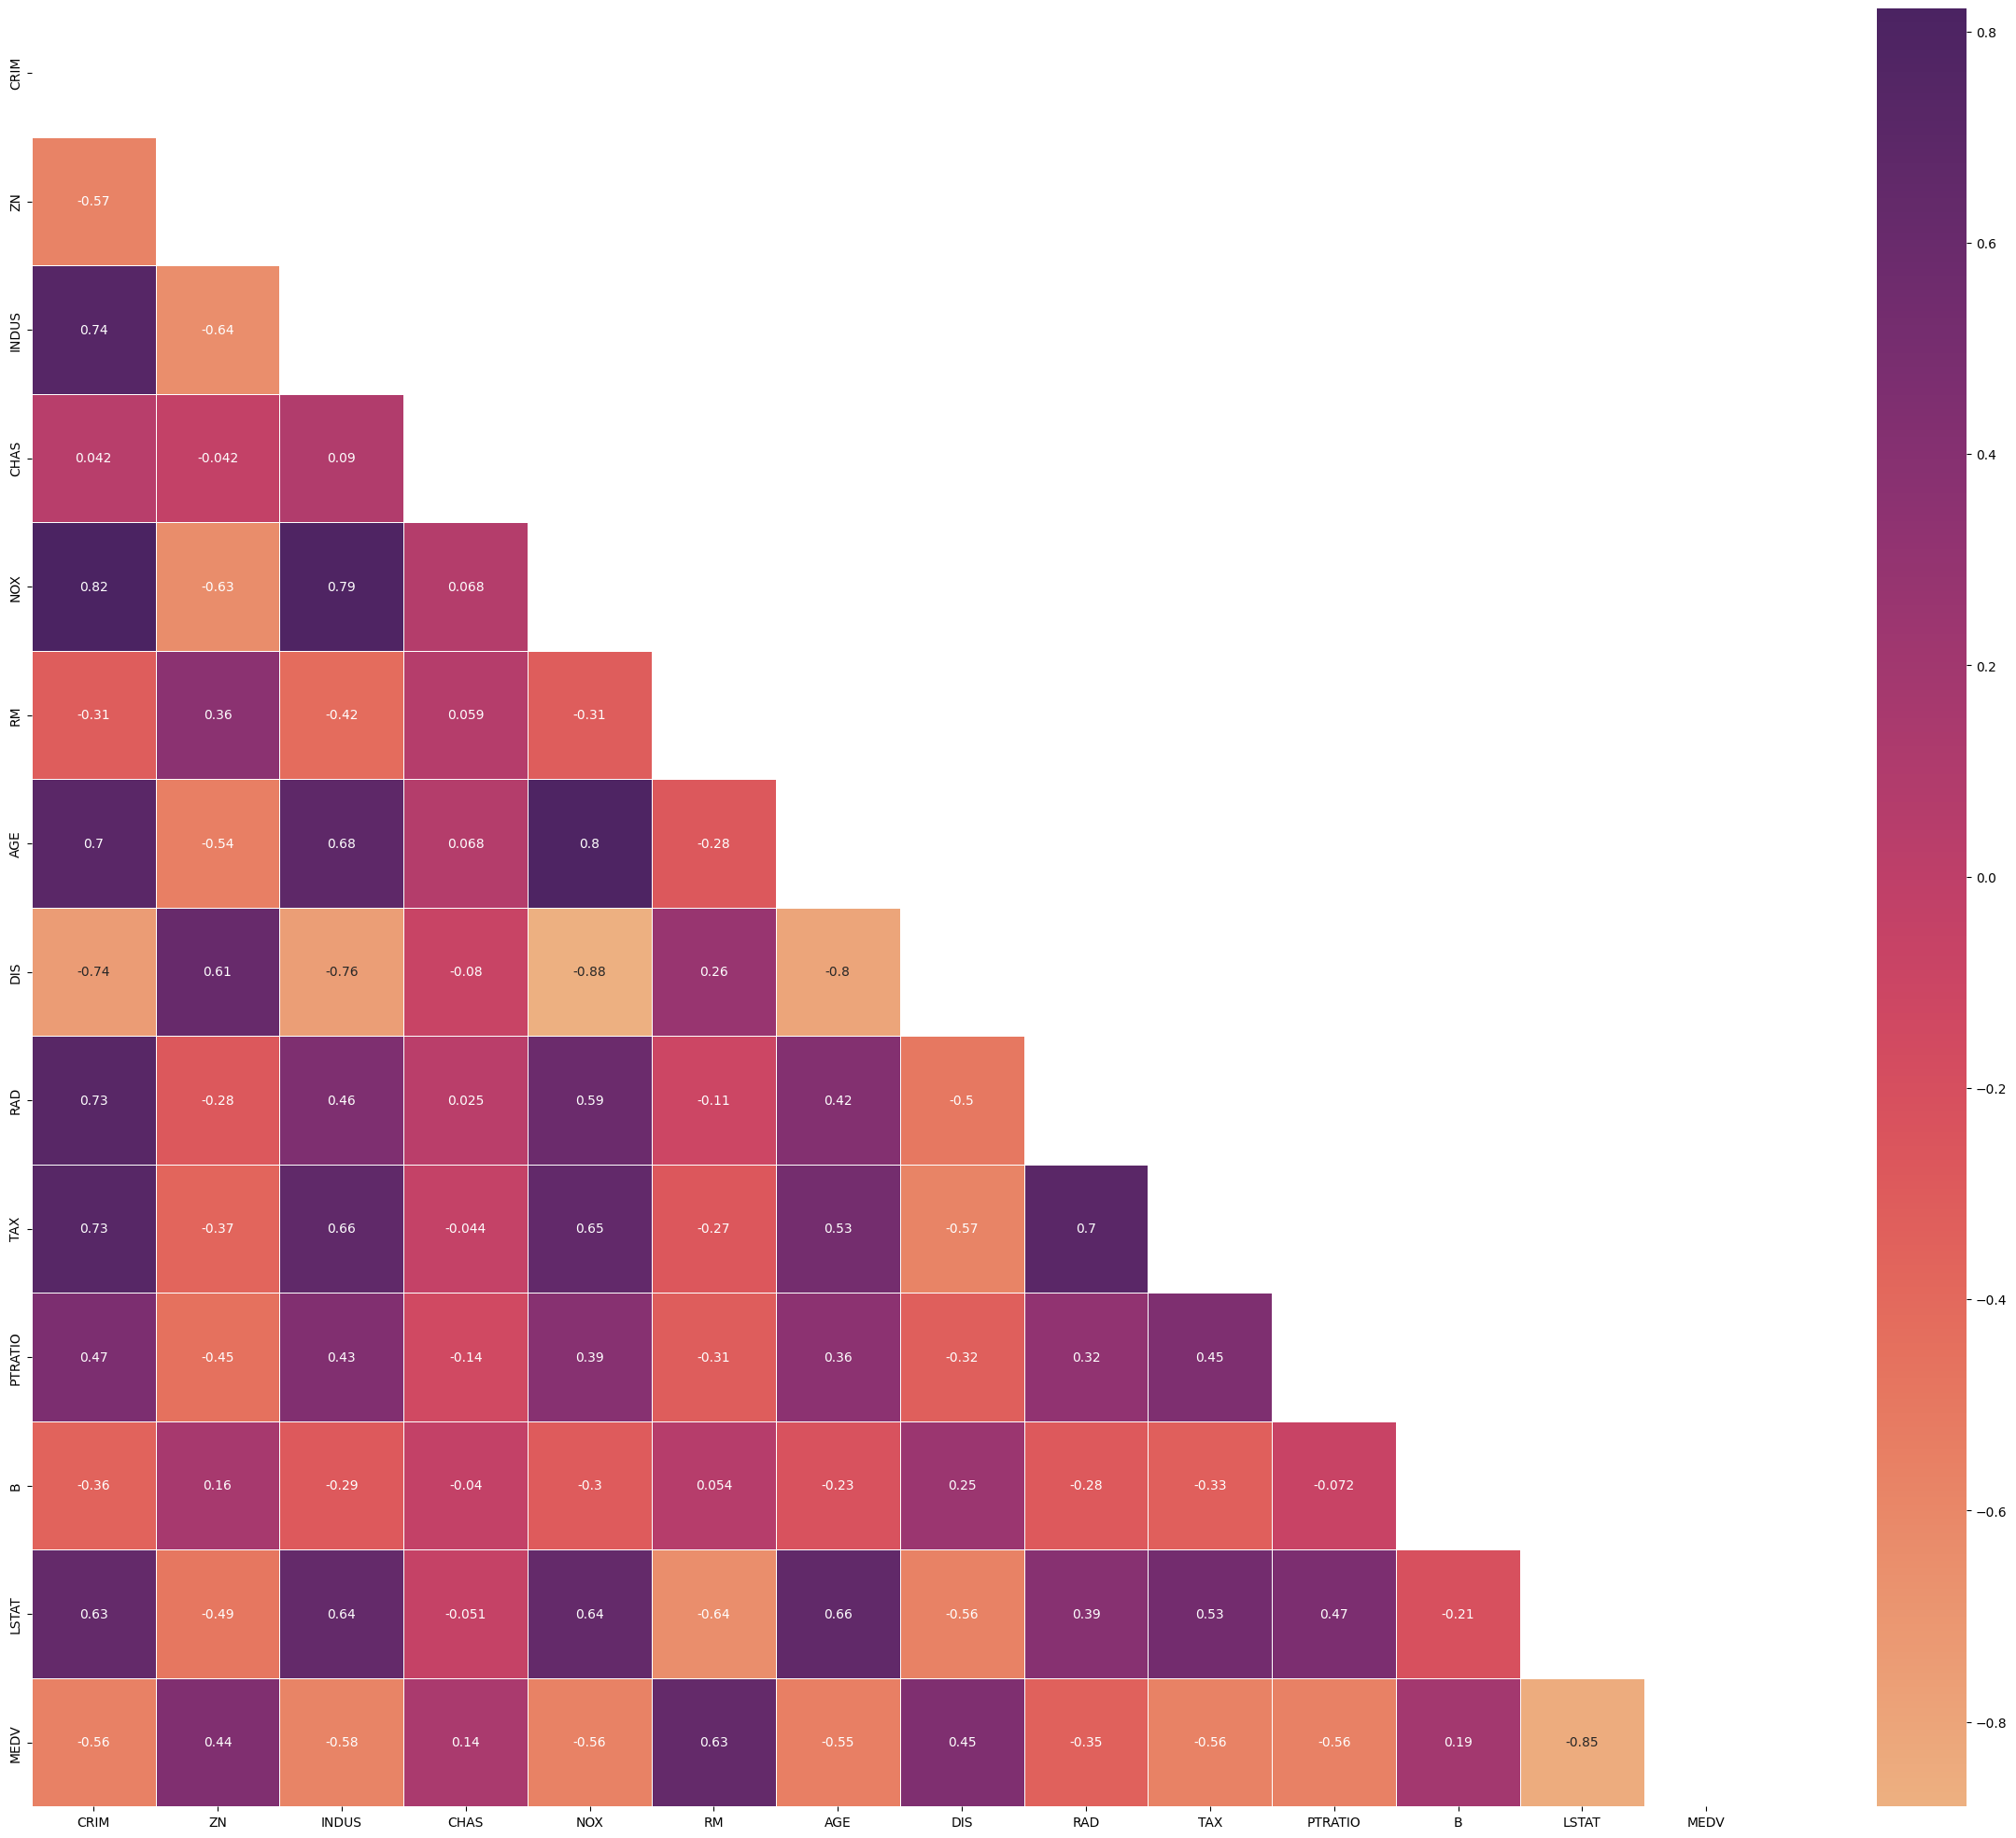

In [4]:
data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


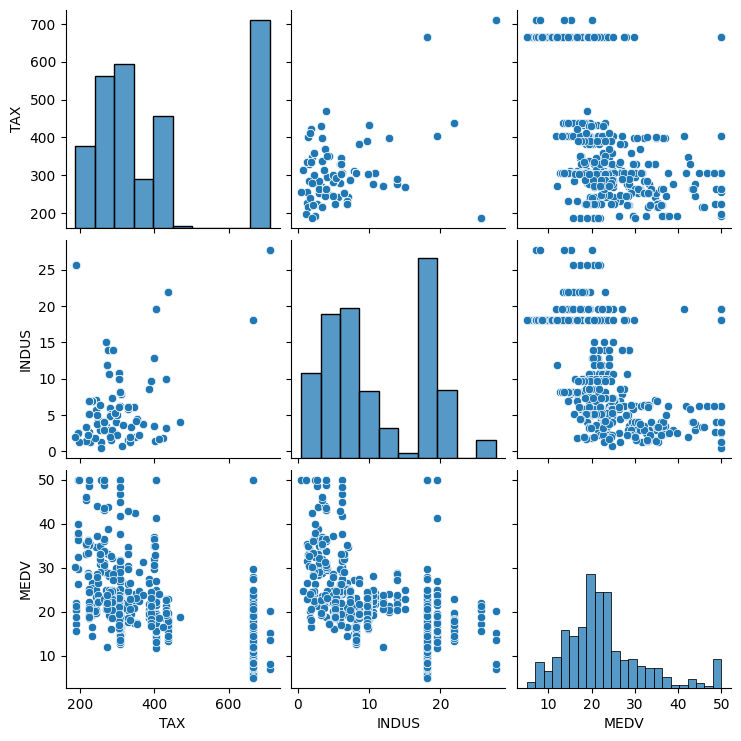

In [7]:
# Pairplot to visualize relationships between features and the target variable
# initial variables would be  TAX, INDUS, and MEDV (Target variable
selected_data = data[['TAX', 'INDUS', 'MEDV']]
sns.pairplot(selected_data)
plt.show()

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


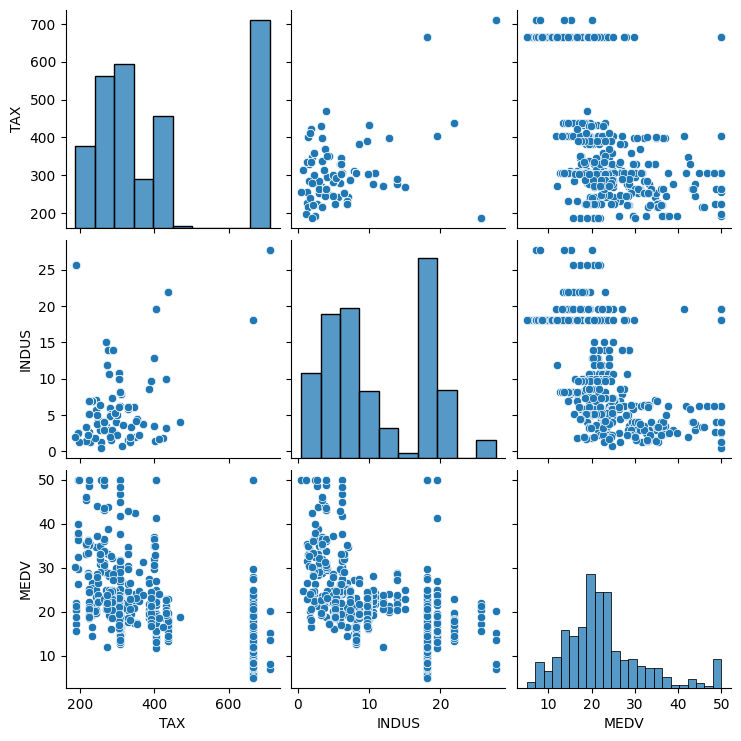

In [8]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(selected_data)
plt.show()

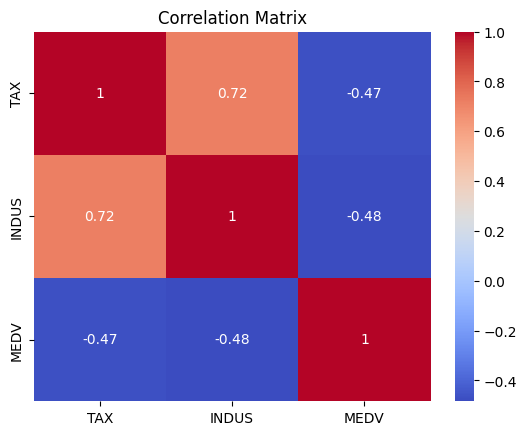

In [9]:
# Correlation matrix to understand the relationships between variables
# matplotlib v3.7.3 was used
corr_matrix = selected_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

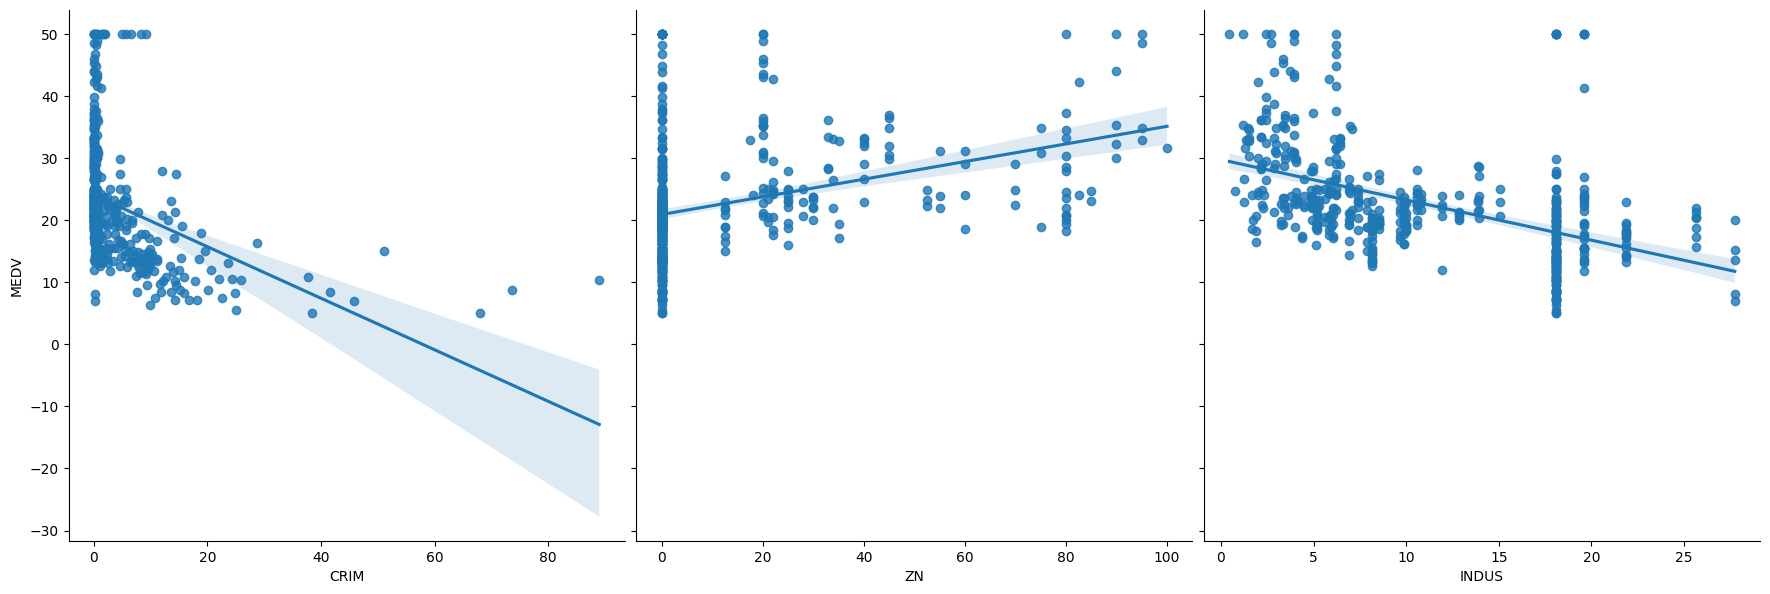

In [27]:
sns.pairplot(data,x_vars=["CRIM","ZN","INDUS"],y_vars =["MEDV"], kind="reg",height=6)

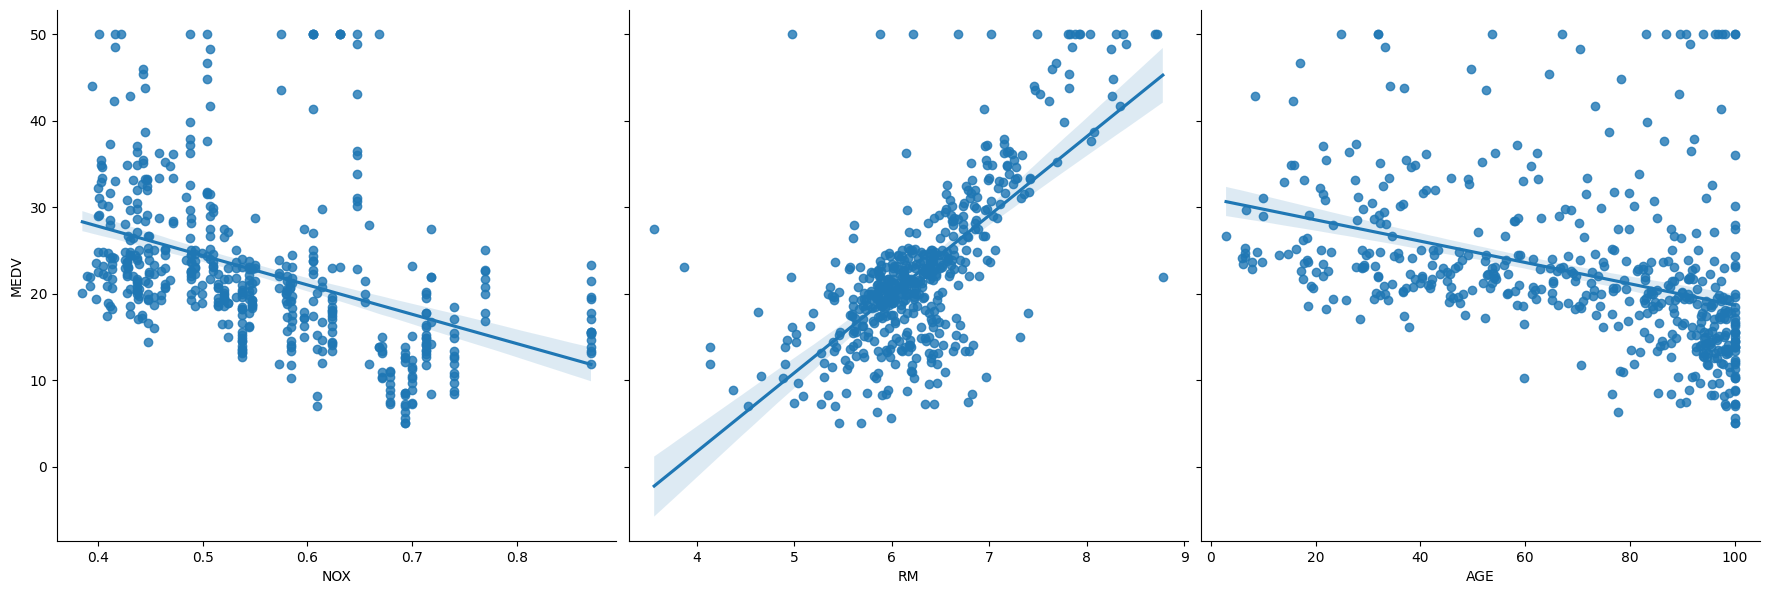

In [30]:
sns.pairplot(data,x_vars=["NOX","RM","AGE"],y_vars =["MEDV"], kind="reg",height=6)

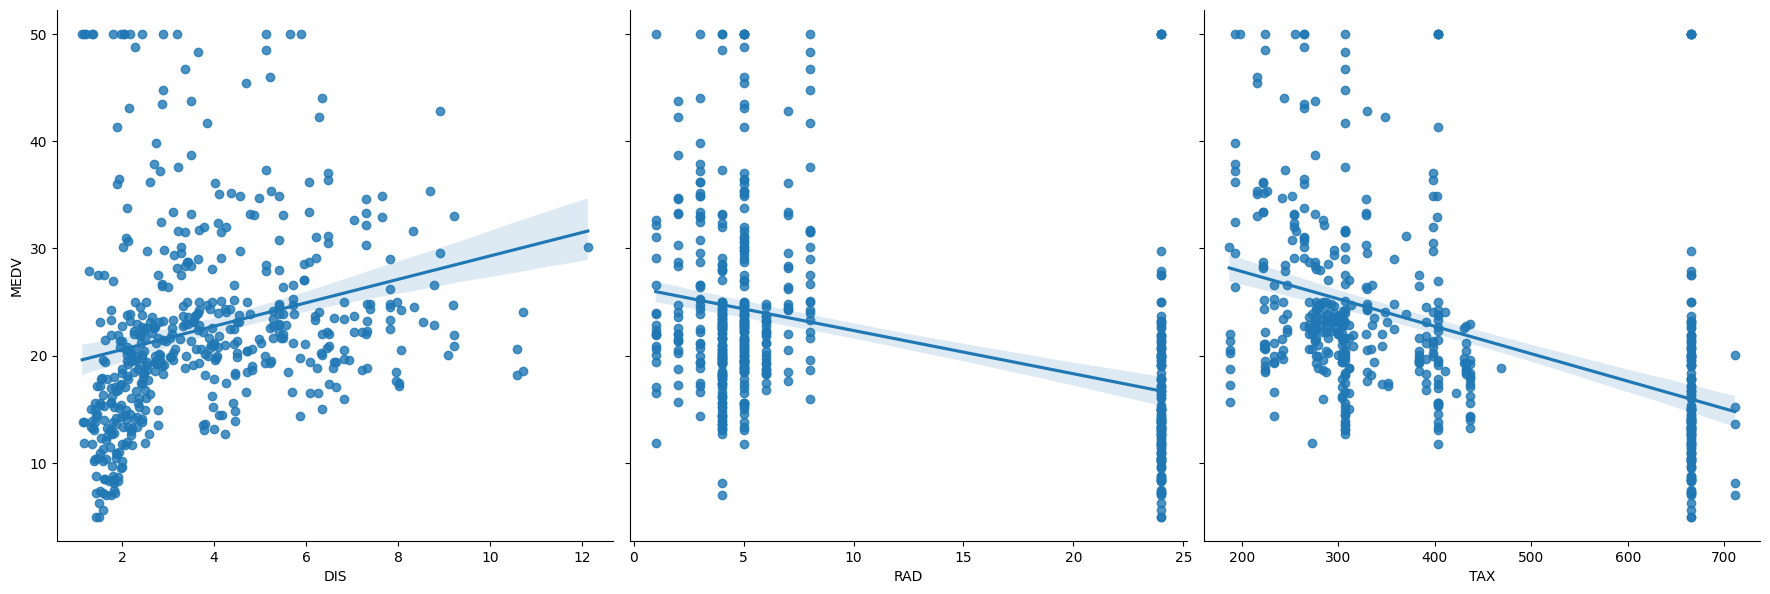

In [28]:
sns.pairplot(data,x_vars=["DIS","RAD","TAX"],y_vars =["MEDV"], kind="reg",height=6)

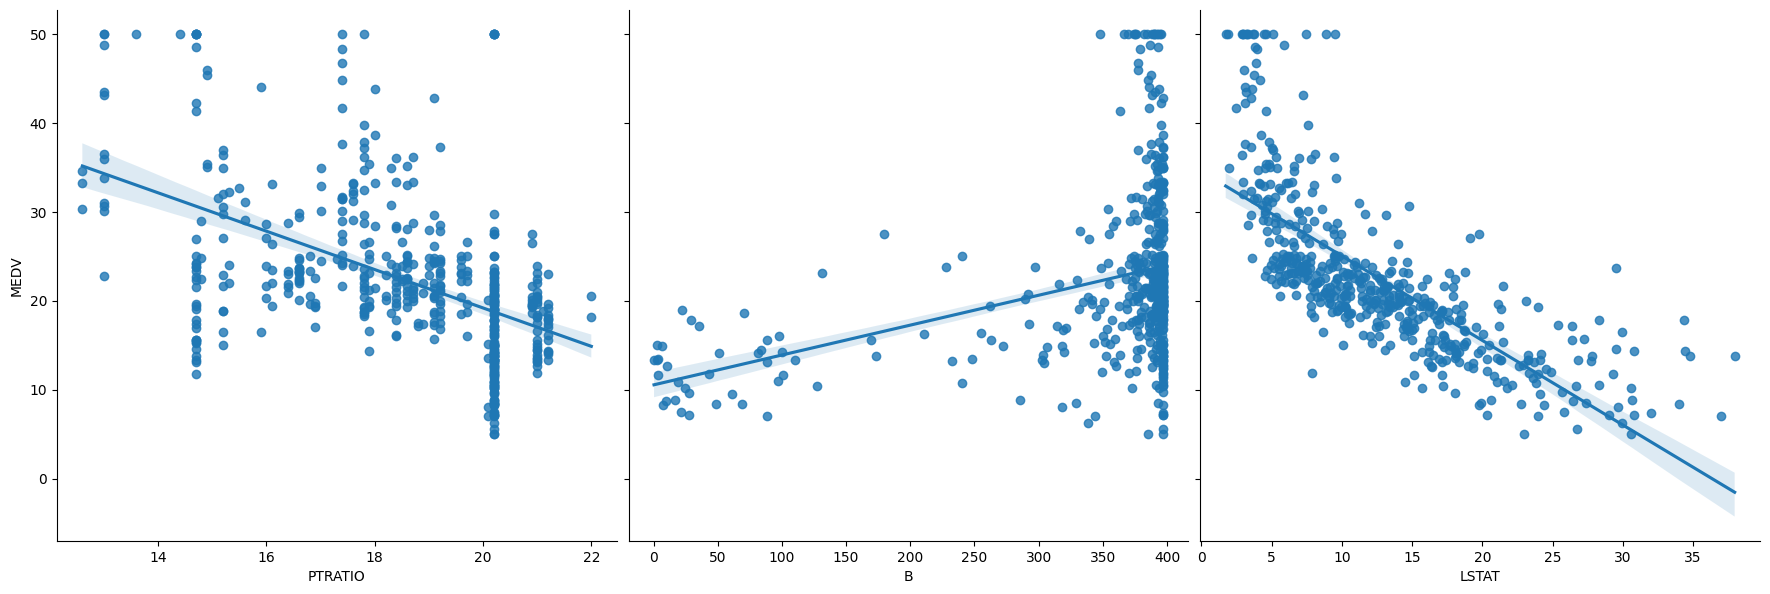

In [29]:
sns.pairplot(data,x_vars=["PTRATIO","B","LSTAT"],y_vars =["MEDV"], kind="reg",height=6)

["CRIM","ZN","INDUS"] features are reflect weak correlation with MDEV variable
CRIM has negative correlation with prices. The areas with lower rate of crime has high prices and vice versa.and there are few areas are with high crime rate else most of the areas has lower crime rate.
ZN - proportiion residential land zoned --this feature posses positive correlation with prices. More the residelntial land zone more higher the housing prices.And also it shows that threr are a large group of area has low prportion of residential land zone.
INDUS- proportion of non retail bussiness acre per town - it shows negative correlation. As the proportion decreases the housing prices lowers.

NOX- Nitric oxide concentration - it shows negatve correaltion .We can see the areas with high cocentration has lower housing prices. lower the pollution of air , higher the housing prices.
RM- Avg number of room per house. - it is obivious that as number of rooms increases the area of house increase and prices will be more. the sme trend we can see in the plot. Also it has strong correlation with prices as compared to other parameters we saw upto now.
AGE- proportion of owner-occupied units built prior to 1940 - this feature shows negative correlation . the older the property lower the housing prices . we can seee the dataset has slighlty more number of old houses.

DIS- weighted distances to five Boston employment centres - This feature shows Positive correlation with housing prices. the areas near to the employment centres/ work places has high prices which is obivious trend we do see in housing prices.
RAD-index of accessibility to radial highways- there is negative correlation with prices.Alos we can see that a lot of areas has low index and few areas has high index for highway accessibility. Mthe plot shows people do not prefer houses near the highways. 3.TAX- full-value property-tax rate per USD 10,000 -Tax Rate shows negative correlation with housing prices. Higher the property tax lower the prices in that area. the housing prics are high where the propery taxes are low. people prefer areas with lower property tax.

PTRATIO- pupil-teacher ratio by town - this feature has negative correltion with housing prices.
B - proportion of blacks by town - It shows positive correlaton with prices. 3.LSTAT-LSTAT - % lower status of the population - This shows strong postive correation . it does not show direct correltion. the plot shows somewhat curvilinear nature.

Till now we checked the individual relations with feature variable. And almost all variable shows linear relationship with target variable. Not every feature has strong correlation. Eventually we will find out which are not the good features for prediction. As the target variable has continous values we wil go for regression techniques. First lets try with Multiple linear regression.

The preassumption for Linear regression is that the features used for moel should not be correlated . From scatter plots above we checked linear relationship of individual feature with target variable. Lets check the correlation of all features with each other using corrrelaton matrix

In [10]:
# # Additionally, we can use ydata to have a profile report of the data
# profile = ProfileReport(data, title="Profiling Report")
# profile.to_widgets()

### 2. Data Preprocessing

- Normalization/Scaling: Apply appropriate scaling techniques to ensure the 
features are on a similar scale, which is crucial for linear models. 
- Encoding: Handle categorical variables (if any) using suitable encoding 
methods. 
- Feature Selection: Analyze feature importance and potentially reduce 
dimensionality by selecting relevant features.

In [11]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [12]:
# Check that datatypes of the columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

However, since our task is to predict <b>the median value of owner-occupied homes</b> in boston, we need to select a few features as other columns are not necessarily needed.

In [13]:
correlation_matrix = data.corr()
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_medv)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [14]:
# Features (X) 
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Target Variable (y)
y = data['MEDV']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v}")


Feature: CRIM, Score: 0.03524009537810732
Feature: ZN, Score: 0.0008589482556769448
Feature: INDUS, Score: 0.005662338347482378
Feature: CHAS, Score: 0.0008297477171962085
Feature: NOX, Score: 0.02075697717815159
Feature: RM, Score: 0.4248261101807911
Feature: AGE, Score: 0.014881722182459763
Feature: DIS, Score: 0.06470562079578808
Feature: RAD, Score: 0.004482859421897592
Feature: TAX, Score: 0.013709174234457432
Feature: PTRATIO, Score: 0.018378366725842286
Feature: B, Score: 0.011531654169695848
Feature: LSTAT, Score: 0.3841363854124536


In [15]:
categorical_features = ['CHAS']
numerical_features = X.columns.difference(categorical_features)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])


data_scaled = pd.DataFrame(X_scaled, columns=numerical_features)
data_scaled[categorical_features] = X[categorical_features].reset_index(drop=True)
print(data_scaled.head())

        AGE         B      CRIM       DIS     INDUS     LSTAT       NOX  \
0 -0.120013  0.441052 -0.419782  0.140214 -1.287909 -1.075562 -0.144217   
1  0.367166  0.441052 -0.417339  0.557160 -0.593381 -0.492439 -0.740262   
2 -0.265812  0.396427 -0.417342  0.557160 -0.593381 -1.208727 -0.740262   
3 -0.809889  0.416163 -0.416750  1.077737 -1.306878 -1.361517 -0.835284   
4 -0.511180  0.441052 -0.412482  1.077737 -1.306878 -1.026501 -0.835284   

    PTRATIO       RAD        RM       TAX        ZN  CHAS  
0 -1.459000 -0.982843  0.413672 -0.666608  0.284830     0  
1 -0.303094 -0.867883  0.194274 -0.987329 -0.487722     0  
2 -0.303094 -0.867883  1.282714 -0.987329 -0.487722     0  
3  0.113032 -0.752922  1.016303 -1.106115 -0.487722     0  
4  0.113032 -0.752922  1.228577 -1.106115 -0.487722     0  


### 3. Model Implementation

- Baseline Model: Start with a simple linear regression model to establish a 
baseline performance. 
- Advanced Models: Implement Ridge Regression, Lasso Regression, and Elastic 
Net to improve the model by addressing overfitting and underfitting issues. 
- Hyperparameter Tuning: Experiment with different hyperparameters (e.g., 
regularization strength) to optimize model performance.

In [17]:
df = data[['TAX', # is necessary because it provides us with the value of the property tax 
           'INDUS', # proportion of non-retail property/business within the town
           'MEDV']] # Median value of owner-occupied homes in $1000's

In [18]:
# Splitting the data into training and testing sets
X = df[['TAX', 'INDUS']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train[['TAX', 'INDUS']] = scaler.fit_transform(X_train[['TAX', 'INDUS']])
X_test[['TAX', 'INDUS']] = scaler.transform(X_test[['TAX', 'INDUS']])

Linear Regression Mean Squared Error (MSE): 51.85836732617485
Linear Regression R-squared (R2): 0.292844783245375


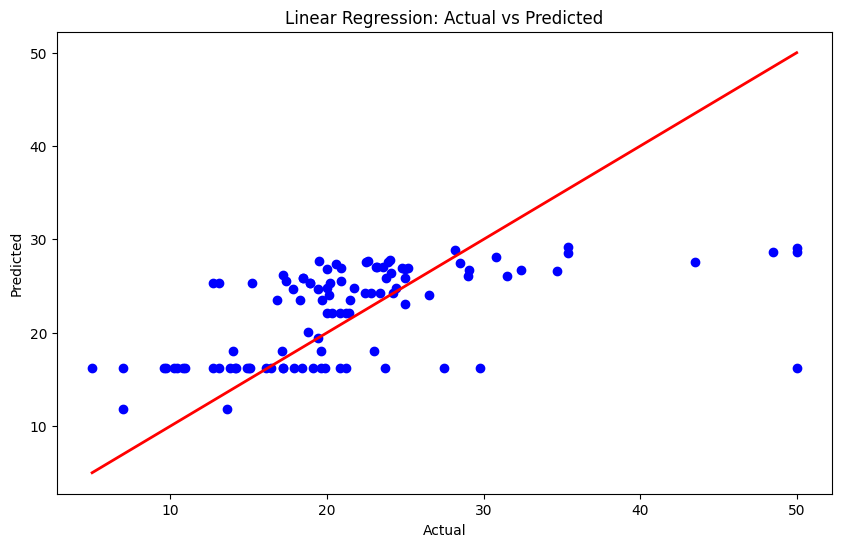

In [20]:
def linear_regression(X_train, y_train, X_test, y_test):
  # Create and train the linear regression model
  linear_model = LinearRegression()
  linear_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred_linear = linear_model.predict(X_test)

  # Evaluate the linear regression model
  mse_linear = mean_squared_error(y_test, y_pred_linear)
  r2_linear = r2_score(y_test, y_pred_linear)

  print(f"Linear Regression Mean Squared Error (MSE): {mse_linear}")
  print(f"Linear Regression R-squared (R2): {r2_linear}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_linear, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Linear Regression: Actual vs Predicted')
  plt.show()

  return linear_model, y_pred_linear

linear_model, y_pred_linear = linear_regression(X_train, y_train, X_test, y_test)

Implement Ridge Regression, Lasso Regression, and Elastic Net

Ridge Regression Mean Squared Error (MSE): 51.85750920491339
Ridge Regression R-squared (R2): 0.29285648482716276


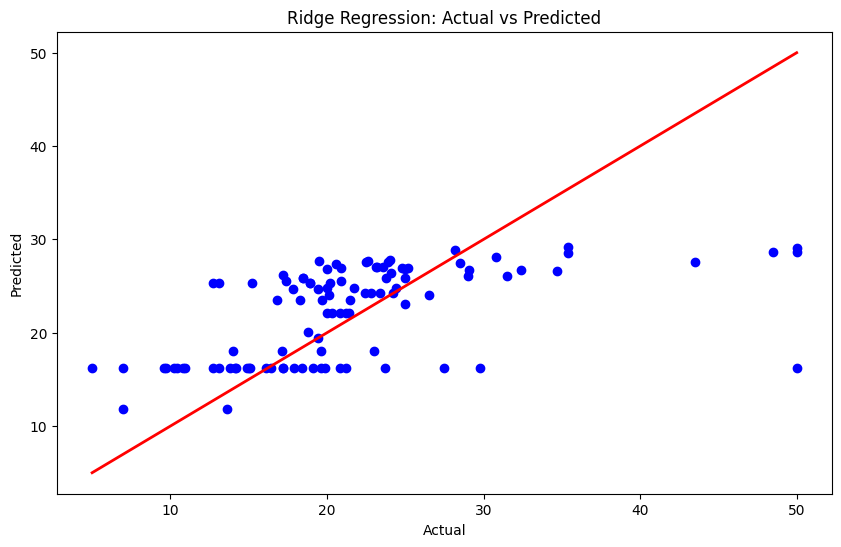

In [21]:
def ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0):
    # Implementing Ridge Regression
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_ridge = ridge_model.predict(X_test)

  # Evaluating the Ridge Regression model
  mse_ridge = mean_squared_error(y_test, y_pred_ridge)
  r2_ridge = r2_score(y_test, y_pred_ridge)

  print(f"Ridge Regression Mean Squared Error (MSE): {mse_ridge}")
  print(f"Ridge Regression R-squared (R2): {r2_ridge}")

  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_ridge, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Ridge Regression: Actual vs Predicted')
  plt.show()
  
  return ridge_model, y_pred_ridge

lasso_model, y_pred_lasso = ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0)

Lasso Regression Mean Squared Error (MSE): 52.88419757437454
Lasso Regression R-squared (R2): 0.27885627475731556


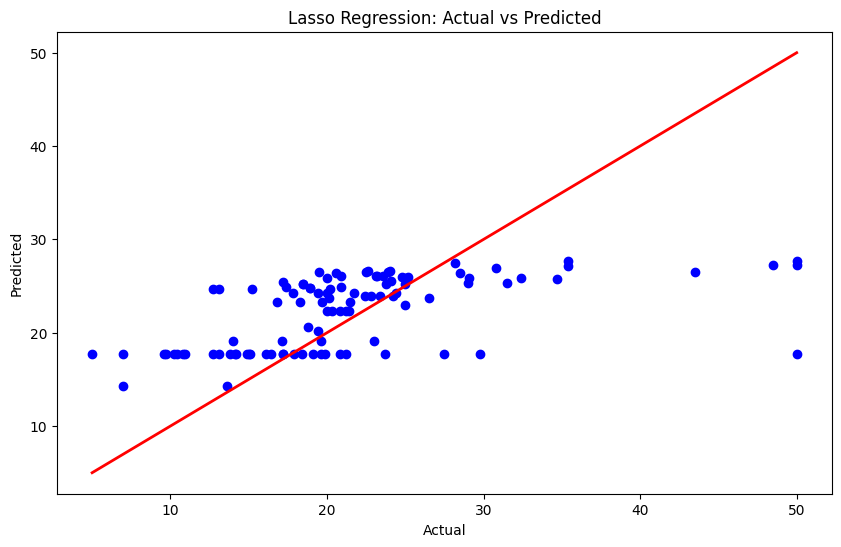

In [22]:
def lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0):
  # Implementing Lasso Regression
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_lasso = lasso_model.predict(X_test)

  # Evaluating the Lasso Regression model
  mse_lasso = mean_squared_error(y_test, y_pred_lasso)
  r2_lasso = r2_score(y_test, y_pred_lasso)

  print(f"Lasso Regression Mean Squared Error (MSE): {mse_lasso}")
  print(f"Lasso Regression R-squared (R2): {r2_lasso}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_lasso, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Lasso Regression: Actual vs Predicted')
  plt.show()

  return lasso_model, y_pred_lasso


lasso_model, y_pred_lasso = lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0)

Elastic Net Regression Mean Squared Error (MSE): 53.95922210559281
Elastic Net Regression R-squared (R2): 0.26419693925204046


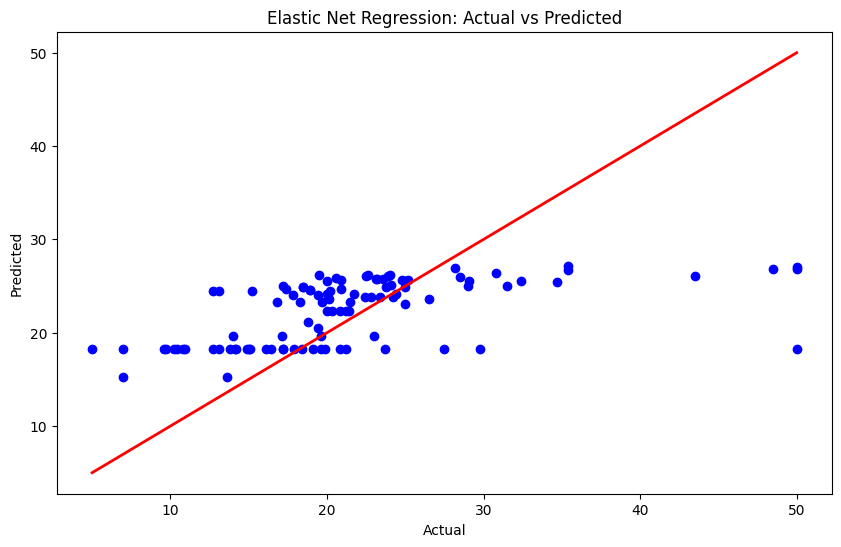

In [23]:
def elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
  # Implementing Elastic Net Regression
  elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
  elastic_net_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_elastic_net = elastic_net_model.predict(X_test)

  # Evaluating the Elastic Net Regression model
  mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
  r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

  print(f"Elastic Net Regression Mean Squared Error (MSE): {mse_elastic_net}")
  print(f"Elastic Net Regression R-squared (R2): {r2_elastic_net}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_elastic_net, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Elastic Net Regression: Actual vs Predicted')
  plt.show()

  return elastic_net_model, y_pred_elastic_net

elastic_net_model, y_pred_elastic_net = elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5)

### 4. Model Evaluation

- Evaluate the models using metrics such as Mean Squared Error (MSE), 
R-squared (R²), and Root Mean Squared Error (RMSE). 
- Compare the performance of different models and discuss the trade-offs

In [24]:
# Create DataFrame to store the evaluation metrics
mse_eval = pd.DataFrame({
  "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net Regression"],
  "MSE": [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_elastic_net),
  ],
})

rsquared_eval = pd.DataFrame({
  "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net Regression"],
  "R²": [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_elastic_net),
  ],
})

rmse_eval = pd.DataFrame({
  "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net Regression"],
  "RMSE": [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic_net)),
  ],
})

NameError: name 'y_pred_ridge' is not defined

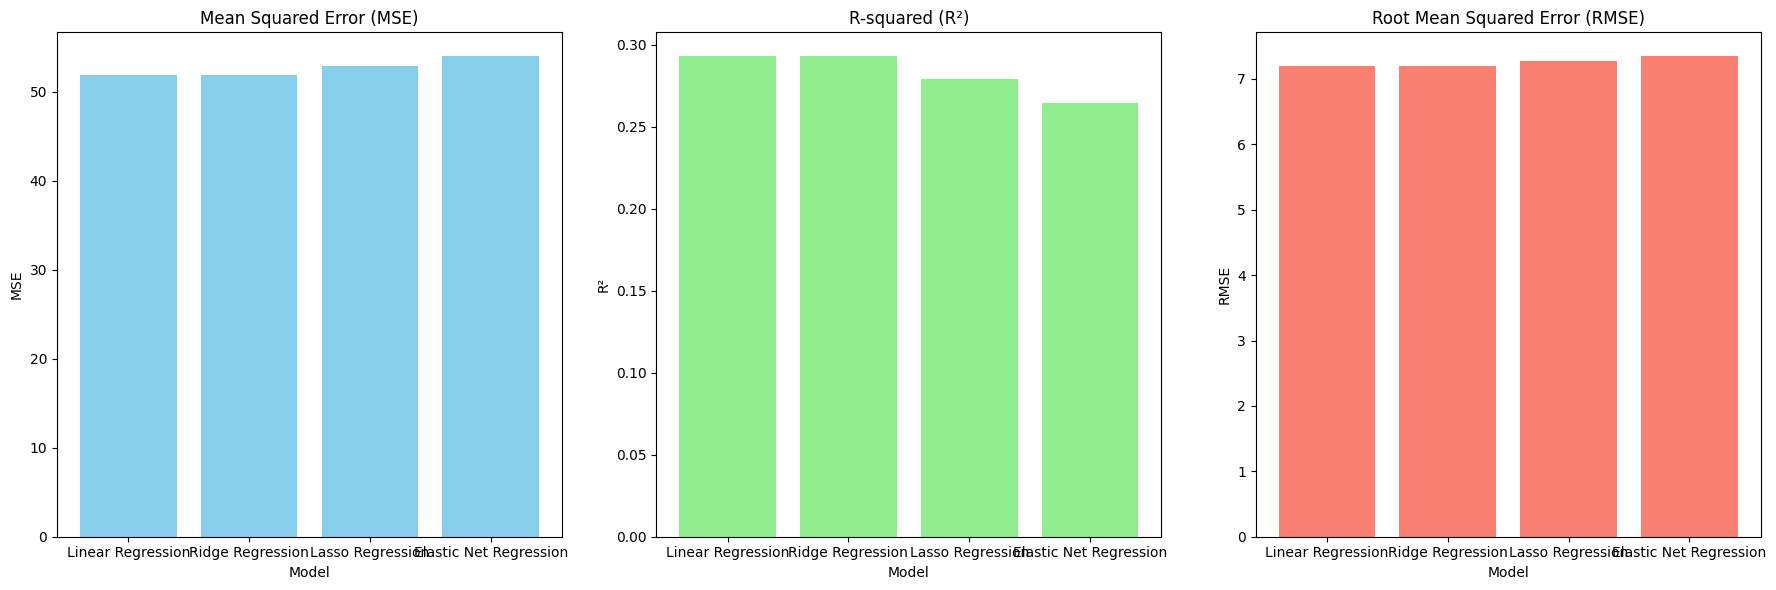

In [53]:
# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Mean Squared Error (MSE)
axes[0].bar(mse_eval['Model'], mse_eval['MSE'], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

# Plotting R-squared (R²)
axes[1].bar(rsquared_eval['Model'], rsquared_eval['R²'], color='lightgreen')
axes[1].set_title('R-squared (R²)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R²')

# Plotting Root Mean Squared Error (RMSE)
axes[2].bar(rmse_eval['Model'], rmse_eval['RMSE'], color='salmon')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

### 5. Analysis and Interpretation

- Interpret the coefficients of the linear models to understand the impact of each 
feature on the target variable. 
- Discuss the significance of regularization in reducing overfitting. 
- Provide insights into which features are most influential in predicting housing 
prices.

In [ ]:
# Extracting coefficients from the linear regression model
linear_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': linear_model.coef_
})

# Extracting coefficients from the ridge regression model
ridge_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': ridge_model.coef_
})

# Extracting coefficients from the lasso regression model
lasso_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': lasso_model.coef_
})

# Extracting coefficients from the elastic net regression model
elastic_net_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': elastic_net_model.coef_
})

# Plotting the coefficients for comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Linear Regression Coefficients
axes[0, 0].barh(linear_coefficients['Feature'], linear_coefficients['Coefficient'], color='skyblue')
axes[0, 0].set_title('Linear Regression Coefficients')
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_ylabel('Feature')

# Ridge Regression Coefficients
axes[0, 1].barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'], color='lightgreen')
axes[0, 1].set_title('Ridge Regression Coefficients')
axes[0, 1].set_xlabel('Coefficient Value')
axes[0, 1].set_ylabel('Feature')

# Lasso Regression Coefficients
axes[1, 0].barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'], color='salmon')
axes[1, 0].set_title('Lasso Regression Coefficients')
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_ylabel('Feature')

# Elastic Net Regression Coefficients
axes[1, 1].barh(elastic_net_coefficients['Feature'], elastic_net_coefficients['Coefficient'], color='orchid')
axes[1, 1].set_title('Elastic Net Regression Coefficients')
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

### 6. Documentation: 
- Submit a comprehensive report detailing your methodology, experiments, results, 
and conclusions. 
- The report should be in a 2-column format (IEEE or ACM) and include sections 
such as Introduction, Methodology, Experiments, Results, and Conclusions